In [1]:
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt

Conservative paths\
BMW data


In [2]:
e=42.2 #kwh, total_battery_capacity
p=[47.5,42.5] #kw, from 10 to 85% charging_power and from 85 to 90%
#charging_time: energy_required/power_availible 
#charging stations:
t_bmw_cons=[]
percentage=[0.69,0.65,0.66,0.50,0.67,0.68,0.64] #percentages to 85%
for level in percentage:
    t_bmw_cons.append((((level*e)/p[0])+((0.05*e)/p[1]))*60)
print(t_bmw_cons)



[39.75945510835913, 37.627244582043346, 38.16029721362229, 29.631455108359138, 38.69334984520124, 39.226402476780194, 37.09419195046439]


In [3]:
sum(t_bmw_cons) #this is the total time to recharge the bmw

260.1923962848298

In [4]:
#total energy recharged
percentage_total=[0.74,0.70,0.71,0.55,0.72,0.73,0.69]
energy1=[]
for level in percentage_total:
    energy1.append(level*e)
print(energy1) #energy in kwh at each charging station
print(sum(energy1)) #total energy recharged

[31.228, 29.54, 29.962, 23.210000000000004, 30.384, 30.806, 29.118]
204.24800000000002


In [5]:
energy1s = energy1[:2] + energy1[2 + 1:] #in the station 3 the price is higher
sum(energy1s)


174.286

In [6]:
#price of the energy
price=[0.30,0.38]
cost=price[1]*energy1[2]+(price[0]*sum(energy1s))
cost #in euros
#to this cost we should also add the initial cost to recharge our car at home, from 0 to 100%.
price_at_home=0.210 #euros for kWh
cost_at_home=price_at_home*e
total_cost_bmw_cons=cost+cost_at_home
print(total_cost_bmw_cons,cost)

72.53336 63.67136


  Nissan Leaf

In [7]:
e=40 #kwh, total_battery_capacity
p=[43.5,39.5,26.5,17.5] #kw, from 10 to 60% charging_power, from 60 to 70%, from 70 to 90% and from 90 to 100% 
#charging_time: energy_required/power_availible 
#charging stations:
percentage1=[0.45,0.45,0.38,0.23,0.41,0.40,0.39] #this percentages are 60%-percentage on which we arrive at each station
p2=0.10
p3=0.20
p4=0.10
t_nissan_cons=[]
for level in percentage1:
    t_nissan_cons.append((((level*e)/p[0])+((p2*e)/p[1])+((p3*e)/p[2]))*60)
print(t_nissan_cons)
t_nissan_cons[5]=t_nissan_cons[5]+((p4*e/p[3])*60) #in this station we recharge to 100% 
t_nissan_cons

[49.01674312115497, 49.01674312115497, 45.15467415563772, 36.87881208667222, 46.80984656943083, 46.2581224314998, 45.70639829356877]


[49.01674312115497,
 49.01674312115497,
 45.15467415563772,
 36.87881208667222,
 46.80984656943083,
 59.972408145785515,
 45.70639829356877]

In [8]:
sum(t_nissan_cons) #total time to charge the Nissan leaf in case 1

332.555625493405

In [9]:
#if we recharge up to 90%
t_nissan_cons[5]=46.258 #here in this station we recharge up to 90%
t_nissan_cons[6]=(0.49*e/p[0]+(p2*e/p[1])+(p3*e/p[2]))*60 #in the last station we charge more in this case 
t_nissan_cons

[49.01674312115497,
 49.01674312115497,
 45.15467415563772,
 36.87881208667222,
 46.80984656943083,
 46.258,
 51.22363967287911]

In [10]:
sum(t_nissan_cons) #total time to charge the Nissan leaf in case 2, which is 6 minutes less, we consider this value

324.3584587269298

In [11]:
#total energy recharged
percentage_total=[0.75,0.75,0.69,0.46,0.71,0.80,0.69]
energyn=[]
for level in percentage_total:
    energyn.append(level*e)
print(energyn) #energy in kwh at each charging station
print(sum(energyn)) #total energy recharged

[30.0, 30.0, 27.599999999999998, 18.400000000000002, 28.4, 32.0, 27.599999999999998]
194.0


In [12]:
energy2 = energyn[:5] + energyn[5 + 1:] #in the station 6 the price is higher 
sum(energy2)


162.0

In [13]:
#price of the energy
price=[0.30,0.39] #euros for kWh
cost=price[1]*energyn[5]+(price[0]*sum(energy2))
#to this cost we should also add the initial cost to recharge our car at home, from 0 to 100%.
price_at_home=0.210 #euros for kWh
cost_at_home=price_at_home*e
total_cost_nissan_cons=cost+cost_at_home
print(total_cost_nissan_cons,cost)

69.48 61.08


Stations 5,6,7 are supplyed with renewable energy 

In [14]:
energy_renewable=sum(energyn[4:7])
energy_non_renewable=sum(energyn[0:4])


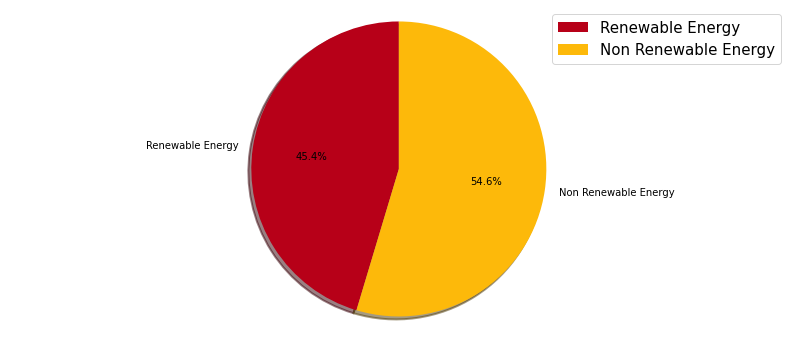

In [15]:
fig1, ax1 = plt.subplots(figsize=(14,6))
sizes=(energy_renewable/sum(energyn),energy_non_renewable/sum(energyn))
labels=('Renewable Energy','Non Renewable Energy')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['#B70018','#FDB90A'],wedgeprops = {'linewidth': 2})
ax1.axis('equal') 
plt.legend(labels, loc="best",prop={'size': 15})
plt.show()

Tesla 

In [16]:
e=95 #kwh, total_battery_capacity
p_150=[150,95] #kw, from 0 to 45% charging_power and from 45 to 100%
p_120=[120,87.5] #kw, from 0 to 55% charging_power and from 55 to 100%
#charging_time: energy_required/power_availible 
#charging stations:
t_tesla_cons=[]
percentage=[0.22,0.4] #percentages to 85%
for level in percentage:
    t_tesla_cons.append((((level*e)/p_120[0])+((0.35*e)/p_120[1]))*60)
print(t_tesla_cons)
sum(t_tesla_cons)


[33.25, 41.8]


75.05

In [17]:
#if we charge at 150kw at the second station
t_tesla_2=((((0.22*e)/p_120[0])+((0.40*e)/p_120[1])+((0.22*e)/p_150[0])+((0.40*e)/p_150[1]))*60)
t_tesla_2

68.86714285714287

In [18]:
sum(t_tesla_cons)-t_tesla_2#we save 6 minutes if we recharge at 150kw in the second station (not always possible)

6.182857142857131

In [19]:
#total energy recharged
percentage_total=[0.57,0.75]
energy3=[]
for level in percentage_total:
    energy3.append(level*e)
print(energy3) #energy in kwh at each charging station
print(sum(energy3)) #total energy recharged

[54.15, 71.25]
125.4


In [20]:
#price of the energy
price=[0,0.29] #the first charging station is free
cost=price[1]*energy3[1]
cost1=price[1]*energy3[0]+price[1]*energy3[1] #if we apply the same tariffs also at the first station
print(cost,cost1) 

20.662499999999998 36.366


In [21]:
price_at_home= 0.210 #total cost including the expenses at home
cost_at_home=0.210*e
total_cost_tesla_cons=cost+cost_at_home
total_cost_tesla_1=cost1+cost_at_home
print(total_cost_tesla_cons,total_cost_tesla_1)

40.6125 56.316


In [22]:
#main values for conservative paths
times_cons=[sum(t_bmw_cons),sum(t_nissan_cons),sum(t_tesla_cons)]
times_cons
costs_cons=[total_cost_bmw_cons,total_cost_nissan_cons,total_cost_tesla_cons]
costs_cons

[72.53336, 69.48, 40.6125]

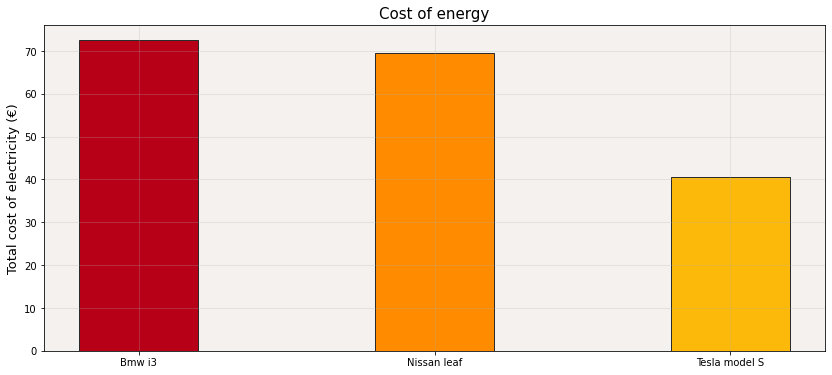

In [23]:
plt.figure(figsize=(14,6))
plt.bar(np.arange(3),costs_cons,width=0.4,color=['#B70018','#FF8C00','#FDB90A'],edgecolor='#2B2B2B')   
plt.xticks(ticks=(range(0,3)),labels=('Bmw i3','Nissan leaf','Tesla model S'))
plt.grid(alpha=0.3)
plt.ylabel('Total cost of electricity (€)',size=13)
plt.title('Cost of energy',size=15)
ax = plt.gca()
ax.set_facecolor('#f4f1ee')
plt.show()

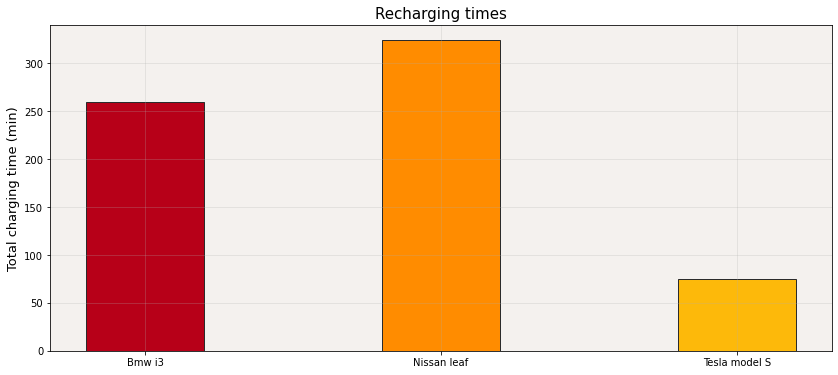

In [24]:
plt.figure(figsize=(14,6))
plt.bar(np.arange(3),times_cons,width=0.4,color=['#B70018','#FF8C00','#FDB90A'],edgecolor='#2B2B2B')
plt.xticks(ticks=(range(0,3)),labels=('Bmw i3','Nissan leaf','Tesla model S'))
plt.grid(alpha=0.3)
plt.ylabel('Total charging time (min)',size=13)
plt.title('Recharging times',size=15)
ax = plt.gca()
ax.set_facecolor('#f4f1ee')
plt.show()

Comparison of CO2 emitted

In [25]:
#car data:
em_n= 134 #all are CO2/km
em_b= 121
em_p= 240
total_distance=978 #km
#for the emissions of the electric vehicles we consider that 45.4% of the energy is form renewable sources,
#so we can consider 0 CO2 for them, and the other 54,6% we consider the carbon intensity of the power sector in Spain
carbon_intensity= 167 #g/kWh
energy_leaf= sum(energyn)
energy_i3= sum(energy1)
energy_tesla=sum(energy3)


In [26]:
#total emissions in grams for petrol cars
total_c_n=em_n*total_distance
total_c_b=em_b*total_distance
total_c_p=em_p*total_distance
print(total_c_n,total_c_b,total_c_p)

131052 118338 234720


In [27]:
#total emissions in grams for electric cars
total_l_cons=carbon_intensity*0.546*energy_leaf
total_i3_cons=carbon_intensity*0.546*energy_i3
total_t_cons=carbon_intensity*0.546*energy_tesla
print(total_l_cons,total_i3_cons,total_t_cons)


17689.308 18623.741136 11434.222800000001


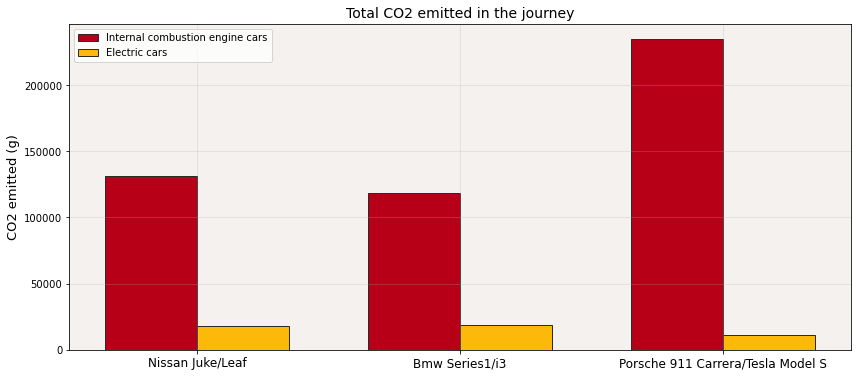

In [28]:
#representation
labels = ['Nissan', 'BMW', 'Tesla/Porsche']
ice_cars= [total_c_n,total_c_b,total_c_p]
electric_cars= [total_l_cons,total_i3_cons,total_t_cons]
x=np.arange(len(labels))
width=0.35
fig, ax = plt.subplots(figsize=(14,6))
rects1 = ax.bar(x - width/2,ice_cars, width, label='Internal combustion engine cars',color='#B70018',edgecolor='#2B2B2B')
rects2 = ax.bar(x + width/2,electric_cars, width, label='Electric cars',color='#FDB90A',edgecolor='#2B2B2B')
plt.grid(alpha=0.3)
plt.xticks(ticks=range(0,3),labels=('Nissan Juke/Leaf','Bmw Series1/i3','Porsche 911 Carrera/Tesla Model S'),size=12)
ax = plt.gca()
ax.set_facecolor('#f4f1ee')
plt.ylabel('CO2 emitted (g)',size=13)
plt.title('Total CO2 emitted in the journey',size=14)
plt.legend()
plt.show()

In [29]:
#consumptions and costs 
cons_n=4 #litres per 100km
cons_b=5.03
cons_p=10.03
#price of fuel
price_fuel=[1.36,1.48] #euros per litre, diesel and petrol


In [30]:
#total consumptions
total_cons_n=(cons_n*total_distance)/100
total_cons_b=(cons_b*total_distance)/100
total_cons_p=(cons_p*total_distance)/100
print(total_cons_n,total_cons_b,total_cons_p)


39.12 49.193400000000004 98.0934


In [31]:
#total costs
total_cost_n=total_cons_n*price_fuel[1]
total_cost_b=total_cons_b*price_fuel[0]
total_cost_p=total_cons_p*price_fuel[0]
print(total_cost_n,total_cost_b,total_cost_p)

57.8976 66.90302400000002 133.407024


In [32]:
#total costs including the refuel to full at home
tank_capacity=[46,48,64] #capacity of the tank in liters
total_n=total_cost_n+price_fuel[1]*tank_capacity[0]
total_b=total_cost_b+price_fuel[0]*tank_capacity[1]
total_p=total_cost_p+price_fuel[0]*tank_capacity[2]




In [33]:
#total costs for electric cars
costs_cons



[72.53336, 69.48, 40.6125]

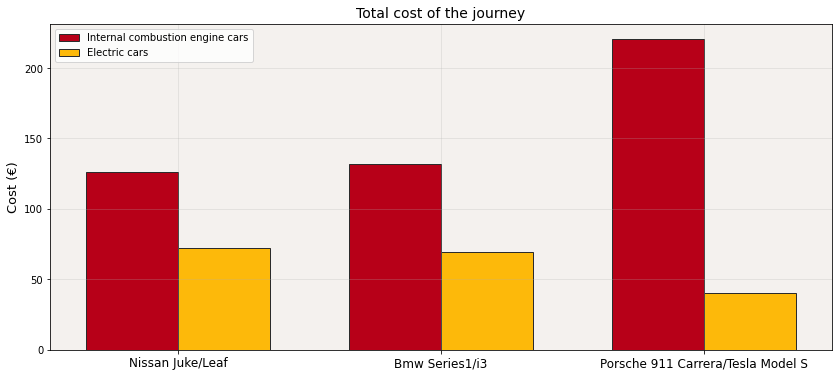

In [34]:
#representation
labels = ['Nissan', 'BMW', 'Tesla/Porsche']
ice_cars= [total_n,total_b,total_p]
electric_cars=costs_cons
x=np.arange(len(labels))
width=0.35
fig, ax = plt.subplots(figsize=(14,6))
rects1 = ax.bar(x - width/2,ice_cars, width, label='Internal combustion engine cars',color='#B70018',edgecolor='#2B2B2B')
rects2 = ax.bar(x + width/2,electric_cars, width, label='Electric cars',color='#FDB90A',edgecolor='#2B2B2B')
plt.grid(alpha=0.3)
plt.xticks(ticks=range(0,3),labels=('Nissan Juke/Leaf','Bmw Series1/i3','Porsche 911 Carrera/Tesla Model S'),size=12)
ax = plt.gca()
ax.set_facecolor('#f4f1ee')
plt.ylabel('Cost (€)',size=13)
plt.title('Total cost of the journey',size=14)
plt.legend()
plt.show()





Ideal paths\
Tesla

In [35]:
e=100 #kwh, total_battery_capacity
p_150=[150,95] #kw, from 0 to 45% charging_power and from 45 to 100%
p_120=[120,87.5] #kw, from 0 to 55% charging_power and from 55 to 100%
#charging_time: energy_required/power_availible 
#Bilbao to first stop
e_consumed1=((-4.5655*10**6)+(1.8463*10**8)+(1.6005*10**8)+(6.3752*10**6))/3600000
percentage1=(1-(e_consumed1/e))
#first stop to Cadiz
e_consumed2=((-3.9657*10**6)+(1.2165*10**8)+(1.0483*10**8)+(-5.2072*10**6))/3600000
percentage2=(1-(e_consumed2/e))
print(percentage1,percentage2)
energy_tesla_opt=e_consumed1+e_consumed2

0.037528611111111165 0.39636916666666666


In [36]:
#total recharging time
t_tesla_opt=(((0.45-percentage1)*e)/p_150[0]+(0.65*e)/p_150[1])*60
t_tesla_opt #in min


57.55148713450292

In [37]:
#total cost of the energy
price=0.30 #euro/kWh
e_recharged=e_consumed1
total_cost_trip_tesla= e_recharged*price
price_at_home= 0.210 #total cost including the expenses at home
cost_at_home=0.210*e
total_cost_tesla_opt=total_cost_trip_tesla+cost_at_home
print(total_cost_trip_tesla,total_cost_tesla_opt)

28.874141666666663 49.87414166666666


BMW i3

In [38]:
e=42.2 #kwh, total_battery_capacity
p=[47.5,42.5] #kw, from 10 to 85% charging_power and from 85 to 90%
#Bilbao to first stop
e_consumed1=((-6.1888*10**6)+(7.9518*10**7)+(4.2707*10**7)+(1.2781*10**7))/3600000
percentage1=(1-(e_consumed1/e))
#first stop to second stop
e_consumed2=((-1.4798*10**6)+(7.5216*10**7)+(4.0443*10**7)+(-1.7360*10**6))/3600000
percentage2=(1-(e_consumed2/e))
#second stop to third stop
e_consumed3=((-1.7289*10**6)+(7.3117*10**7)+(3.9328*10**7)+(-3.2810*10**6))/3600000
percentage3=(1-(e_consumed3/e))
#third stop to fourth stop
e_consumed4=((-1.4809*10**6)+(6.9380*10**7)+(3.7438*10**7)+(-7.0429*10**6))/3600000
percentage4=(1-(e_consumed4/e))
#fourth stop to Cadiz
e_consumed5=((1125.2)+(9.0812*10**6)+(4.8844*10**7))/3600000
percentage5=(1-(e_consumed5/e))
print(percentage1,percentage2,percentage3,percentage4,percentage5)
energy_bmw_opt=e_consumed1+e_consumed2+e_consumed3+e_consumed4+e_consumed5





0.15207214323328078 0.2598525539757768 0.2928179304897315 0.35298709847288057 0.6187050737230121


In [39]:
#total recharging time in minutes 
percentages=[percentage1,percentage2,percentage3,percentage4]
t_bmw_opt=[]
for pc in percentages:
    t_bmw_opt.append((((0.85-pc)*e)/p[0]+(0.15*e)/p[1])*60)
print(t_bmw_opt)
t_total_bmw_opt=sum(t_bmw_opt) 
print(t_total_bmw_opt)

[46.13969865841072, 40.39443550051599, 38.63720743034056, 35.42987409700722]
160.60121568627451


In [40]:
#total cost of the energy
price=[0.3049,0.39] #euro/kWh, the price in the third charging station is higher 
e_recharged1=e_consumed1+e_consumed2+e_consumed4 #energy recharged at price 1
e_recharged2=e_consumed3 #energy recharged at price 2
total_cost_trip_bmw= e_recharged1*price[0]+e_recharged2*price[1]
price_at_home= 0.210 #total cost including the expenses at home
cost_at_home=0.210*e
total_cost_bmw_opt=total_cost_trip_bmw+cost_at_home
print(total_cost_trip_bmw,total_cost_bmw_opt)

40.39719070555556 49.25919070555556


Nissan leaf 

In [41]:
e=40 #kwh, total_battery_capacity
p=[43.5,39.5,26.5,17.5] #kw, from 10 to 60% charging_power, from 60 to 70%, from 70 to 90% and from 90 to 100% 
#charging_time: energy_required/power_availible 
#Bilbao to first stop
e_consumed1=((-4.4537*10**5)+(6.9519*10**7)+(4.4914*10**7)+(1.5704*10**7))/3600000
percentage1=(1-(e_consumed1/e))
#first stop to second stop
e_consumed2=((-1.4759*10**5)+(5.9393*10**7)+(3.8198*10**7)+(-1.0732*10**6))/3600000
percentage2=(1-(e_consumed2/e))
#second stop to third stop
e_consumed3=((-1.7440*10**6)+(6.4060*10**7)+(4.0939*10**7)+(-1.0096*10**7))/3600000
percentage3=(1-(e_consumed3/e))
#third stop to fourth stop
e_consumed4=((-1.4772*10**6)+(6.0672*10**7)+(3.9648*10**7)+(2.1923*10**6))/3600000
percentage4=(1-(e_consumed4/e))
#fourth stop to Cadiz
e_consumed5=((-1.1804*10**6)+(5.2668*10**7)+(3.5272*10**7)+(-5.8583*10**6))/3600000
percentage5=(1-(e_consumed5/e))
print(percentage1,percentage2,percentage3,percentage4,percentage5)
energy_nissan_opt=e_consumed1+e_consumed2+e_consumed3+e_consumed4+e_consumed5

0.09936368055555556 0.33076243055555554 0.35306249999999995 0.2983673611111112 0.43818541666666666


In [42]:
#total recharging time in minutes 
percentages=[percentage1,percentage2,percentage3,percentage4]
t_nissan_opt=[]
for pc in percentages:
    t_nissan_opt.append((((0.60-pc)*e)/p[0]+(0.10*e)/p[1]+(0.20*e)/p[2]+(0.10*e)/p[3])*60)
print(t_nissan_opt)
t_total_nissan_opt=sum(t_nissan_opt) 
print(t_total_nissan_opt)

[65.52475680478935, 52.75792921858245, 51.52758055957861, 54.54524339482765]
224.35550997777807


In [43]:
#total cost of the energy
price=[0.3049,0.25] #euro/kWh, the price in the second charging station is lower
e_recharged1=e_consumed1+e_consumed3+e_consumed4 #energy recharged at price 1
e_recharged2=e_consumed2 #energy recharged at price 2
total_cost_trip_nissan= e_recharged1*price[0]+e_recharged2*price[1]
price_at_home= 0.210 #total cost including the expenses at home
cost_at_home=0.210*e
total_cost_nissan_opt=total_cost_trip_nissan+cost_at_home
print(total_cost_trip_nissan,total_cost_nissan_opt)

34.12369766027778 42.523697660277776


In [44]:
times_opt=[t_total_bmw_opt,t_total_nissan_opt,t_tesla_opt]
costs_opt=[total_cost_bmw_opt,total_cost_nissan_opt,total_cost_tesla_opt]

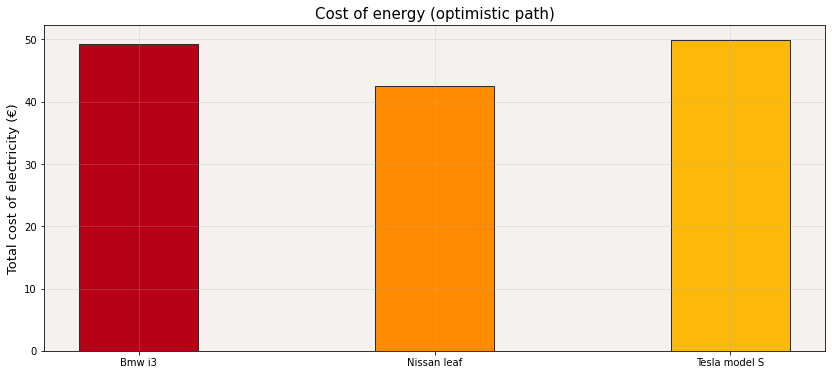

In [45]:
plt.figure(figsize=(14,6))
plt.bar(np.arange(3),costs_opt,width=0.4,color=['#B70018','#FF8C00','#FDB90A'],edgecolor='#2B2B2B')   
plt.xticks(ticks=(range(0,3)),labels=('Bmw i3','Nissan leaf','Tesla model S'))
plt.grid(alpha=0.3)
plt.ylabel('Total cost of electricity (€)',size=13)
plt.title('Cost of energy (optimistic path)',size=15)
ax = plt.gca()
ax.set_facecolor('#f4f1ee')
plt.show()

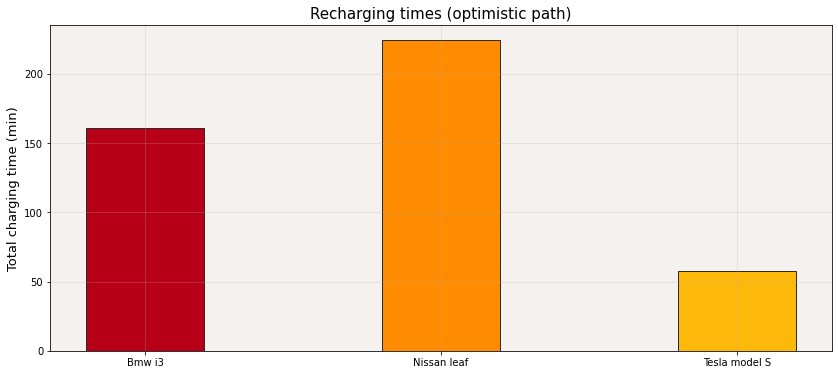

In [46]:
plt.figure(figsize=(14,6))
plt.bar(np.arange(3),times_opt,width=0.4,color=['#B70018','#FF8C00','#FDB90A'],edgecolor='#2B2B2B')
plt.xticks(ticks=(range(0,3)),labels=('Bmw i3','Nissan leaf','Tesla model S'))
plt.grid(alpha=0.3)
plt.ylabel('Total charging time (min)',size=13)
plt.title('Recharging times (optimistic path)',size=15)
ax = plt.gca()
ax.set_facecolor('#f4f1ee')
plt.show()

In [47]:
#CO2 emitted in optimal paths
total_nissan_opt=carbon_intensity*0.546*energy_nissan_opt
total_bmw_opt=carbon_intensity*0.546*energy_bmw_opt
total_tesla_opt=carbon_intensity*0.546*energy_tesla_opt
print(total_nissan_opt,total_bmw_opt,total_tesla_opt)




12693.477627133334 12788.681391607333 14280.033282666665


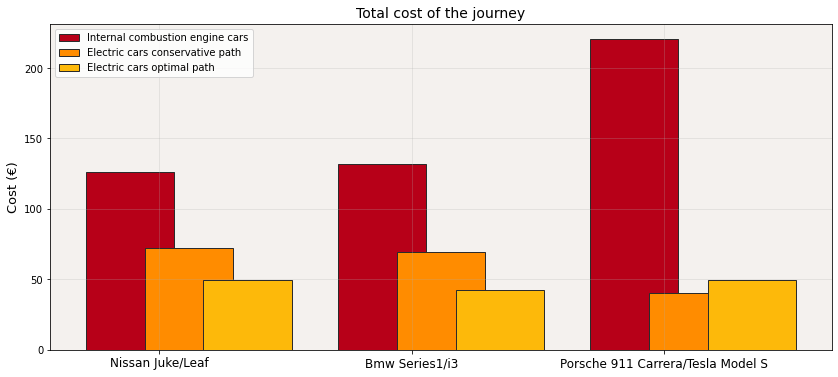

In [48]:
labels = ['Nissan', 'BMW', 'Tesla/Porsche']
ice_cars= [total_n,total_b,total_p]
electric_cars_opt=costs_opt
electric_cars_cons=costs_cons
x=np.arange(len(labels))
width=0.35
fig, ax = plt.subplots(figsize=(14,6))
rects1 = ax.bar(x - width/3,ice_cars, width, label='Internal combustion engine cars',color='#B70018',edgecolor='#2B2B2B')
rects2 = ax.bar(x + width/3,electric_cars_cons, width, label='Electric cars conservative path',color='#FF8C00',edgecolor='#2B2B2B')
rects3 = ax.bar(x + width,electric_cars_opt, width, label='Electric cars optimal path',color='#FDB90A',edgecolor='#2B2B2B')
plt.grid(alpha=0.3)
plt.xticks(ticks=range(0,3),labels=('Nissan Juke/Leaf','Bmw Series1/i3','Porsche 911 Carrera/Tesla Model S'),size=12)
ax = plt.gca()
ax.set_facecolor('#f4f1ee')
plt.ylabel('Cost (€)',size=13)
plt.title('Total cost of the journey',size=14)
plt.legend()
plt.show()

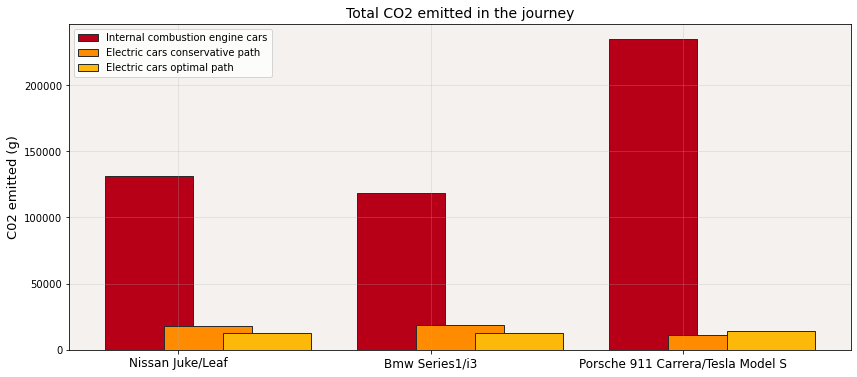

In [49]:
labels = ['Nissan', 'BMW', 'Tesla/Porsche']
ice_cars= [total_c_n,total_c_b,total_c_p]
electric_cars_opt=[total_nissan_opt,total_bmw_opt,total_tesla_opt]
electric_cars_cons=[total_l_cons,total_i3_cons,total_t_cons]
x=np.arange(len(labels))
width=0.35
fig, ax = plt.subplots(figsize=(14,6))
rects1 = ax.bar(x - width/3,ice_cars, width, label='Internal combustion engine cars',color='#B70018',edgecolor='#2B2B2B')
rects2 = ax.bar(x + width/3,electric_cars_cons, width, label='Electric cars conservative path',color='#FF8C00',edgecolor='#2B2B2B')
rects3 = ax.bar(x + width,electric_cars_opt, width, label='Electric cars optimal path',color='#FDB90A',edgecolor='#2B2B2B')
plt.grid(alpha=0.3)
plt.xticks(ticks=range(0,3),labels=('Nissan Juke/Leaf','Bmw Series1/i3','Porsche 911 Carrera/Tesla Model S'),size=12)
ax = plt.gca()
ax.set_facecolor('#f4f1ee')
plt.ylabel('C02 emitted (g)',size=13)
plt.title('Total CO2 emitted in the journey',size=14)
plt.legend()
plt.show()

Worst case scenarios

In [50]:
#calculations of specific energy consupmtion depending on temperatures Spain
e_sp=[]
for t in [-4,0,5,10,20]:
    e_sp.append(8.10*10**-9*t**6-3*10**-6*t**5+0.0001*t**4+0.0028*t**3-0.0546*t**2-2.7979*t+206.22)
print(e_sp)
e_sp=np.array(e_sp)

[216.3875051776, 206.22, 191.2687515625, 176.2891, 157.7404]


In [51]:
#calculations of new ranges Spain
e1p=e_sp[0]/e_sp[4] # this is the increase in energy consumption 
e2p=e_sp[1]/e_sp[4] 
e3p=e_sp[2]/e_sp[4]
e4p=e_sp[3]/e_sp[4]
print(e1p,e2p,e3p,e4p)

1.3717950834256791 1.3073378791989878 1.212553991003573 1.117590040344769


In [52]:
#calculations of specific energy consupmtion depending on temperatures Canada
e_ca=[]
for t in [-10,-2,20]:
    e_ca.append(8.10*10**-9*t**6-3*10**-6*t**5+0.0001*t**4+0.0028*t**3-0.0546*t**2-2.7979*t+206.22)
print(e_ca)

[227.2471, 211.5766965184, 157.7404]


In [53]:
#calculations of new ranges Canada
e1p_ca=e_ca[0]/e_ca[2]
e2p_ca=e_ca[1]/e_ca[2]
print(e1p_ca,e2p_ca)


1.440639810726992 1.3412968175457907


In [54]:
#worst case scenario Spain
p50=[43.5,39.5,26.5,17.5]#kw,from 10 to 60% charging_power, from 60 to 70%, from 70 to 90% and from 90 to 100% 
#we increase the energy consumed by the factors found before
e1=(4.2387*10**7*1.37)/3600000 #to first stop   
percentage1=(0.5-(e1/40)) #(we start at 50% here)  
e2=(6.6844*10**7*1.37)/3600000 #to second stop
percentage2=(1-(e2/40))
e3=(7.3763*10**7*1.37)/3600000 #to third stop
percentage3=(1-(e3/40))
e4=(6.5874*10**7*1.37)/3600000 #to fourth stop
percentage4=(1-(e4/40))
e5=(5.5358*10**7*1.31)/3600000 #to fifth stop
percentage5=(1-(e5/40))
e6=(8.3788*10**7*1.21)/3600000 #to sixth stop
percentage6=(1-(e6/40))
e7=(8.3925*10**7*1.21)/3600000 #to seventh stop
percentage7=(1-(e7/40))
e8=(4.081*10**7*1.11)/3600000 #to Cadiz
percentage8=(1-(e8/40))
print(percentage1,percentage2,percentage3,percentage4,percentage5,percentage6,percentage7,percentage8)
percentages=[percentage1,percentage2,percentage3,percentage4,percentage5,percentage6,percentage7]

0.09673479166666665 0.3640536111111111 0.2982270138888887 0.37328208333333335 0.4963959722222222 0.2959480555555556 0.29479687500000007 0.6854229166666665


In [55]:
#total recharging time
p50=[43.5,39.5,26.5,17.5]#kW,from 0% to 60% charging_power, from 60% to 70%, from 70% to 90% and from 90% to 100% (in 50kW stations)
p22=[22,15.5]#kW, from 0% to 80% and from 80% to 100% (in case of 22kW station, 5th stop) 
e=40
t_worst_spain=[]
for pc in percentages:
    t_worst_spain.append((((0.60-pc)*e)/p50[0]+(0.10*e)/p50[1]+(0.20*e)/p50[2]+(0.10*e)/p50[3])*60)
print(t_worst_spain)
t_worst_spain[5]=((0.80-percentages[5])*e/p22[0]+(0.20*e)/p22[1])*60 #the 5th station has 22kW of max power 
t_total_worst_spain=sum(t_worst_spain)
print(t_total_worst_spain,t_worst_spain) #this is the total recharging time 

[65.66979895038322, 50.92117442931041, 54.55298668984682, 50.412017341187806, 43.619526919731875, 54.678722322030715, 54.7422357319924]
405.8729668464213 [65.66979895038322, 50.92117442931041, 54.55298668984682, 50.412017341187806, 43.619526919731875, 85.95522678396871, 54.7422357319924]


In [56]:
#total cost of the energy
price=[0.30,0.39] #only station station 2 has the price so high
e_recharged1=((e1+e3+e4)*1.37)+((e5*1.31))+((e6+e7)*1.11)
e_recharged2=e2
total_cost_worst_nissan= e_recharged1*price[0]+e_recharged2*price[1]
price_at_home= 0.210 #total cost including the expenses at home
cost_at_home=0.210*20 #at home we recharge only to 50% 
total_cost_nissan_worst=total_cost_worst_nissan+cost_at_home
print(total_cost_worst_nissan,total_cost_nissan_worst)

65.078766975 69.278766975


In [57]:
#worst case scenario canada
e=40 #kWh, total_battery_capacity, this case different beacuse of temperatures
p=[43.5,39.5,26.5,17.5]#kw, from 10 to 60% charging_power, from 60 to 70%, from 70 to 90% and from 90 to 100% 
#charging_time: energy_required/power_availible 

e1c=((1.3247*10**7)*1.44)/3600000 #to first stop
percentage1=(0.5-(e1c/e))
e2c=(6.2535*10**7*1.44)/3600000 #to second stop
percentage2=(1-(e2c/e))
e3c=(4.2342*10**7*1.34)/3600000 #to third stop
percentage3=(1-(e3c/e))
e4c=(7.9343*10**7*1.34)/3600000 #to fourth stop
percentage4=(1-(e4c/e))
e5c=(3.6514*10**7*1.34)/3600000 #to fifth stop
percentage5=(1-(e5c/e))
e6c=(4.6780*10**7*1.34)/3600000 #to sixth stop
percentage6=(1-(e6c/e))
e7c=(5.0006*10**7*1.34)/3600000 #to seventh stop
percentage7=(1-(e7c/e))
e8c=(3.5579*10**7*1.34)/3600000 #to eight stop
percentage8=(1-(e8c/e))
e9c=(6.0755*10**7*1.34)/3600000 #to nineth stop
percentage9=(1-(e9c/e))
e10c=(5.1443*10**7*1.34)/3600000 #to tenth Cadiz
percentage10=(1-(e10c/e))
e11c=(3.3742*10**7*1.34)/3600000 #to Quebec city
percentage11=(1-(e11c/e))
print(percentage1,percentage2,percentage3,percentage4,percentage5,percentage6,percentage7,percentage8,percentage9,percentage10,percentage11)
percentages=[percentage1,percentage2,percentage3,percentage4,percentage5,percentage6,percentage7,percentage8,percentage9,percentage10]



0.36753 0.37465000000000004 0.6059841666666665 0.26166930555555556 0.6602169444444445 0.5646861111111111 0.5346663888888888 0.6689176388888889 0.4346409722222222 0.5212943055555556 0.6860119444444445


In [58]:
#total recharging time
e=40
t_worst_canada=[]
for pc in percentages:
    t_worst_canada.append((((0.60-pc)*e)/p[0]+(0.10*e)/p[1]+(0.20*e)/p[2]+(0.10*e)/p[3])*60)
print(t_worst_canada)
t_total_worst_canada=sum(t_worst_canada)
print(t_total_worst_canada)

[50.72937366302689, 50.336546076819985, 37.57328170900391, 56.56996370134107, 34.58112845229892, 39.85179511896558, 41.50805565536405, 34.10109013812267, 47.026699333524974, 42.24582577030658]
434.5237596187746


In [59]:
tc=t_worst_canada
#total cost of the energy
price=[0.16,0.20,0.28,0.33] #the price here is canadian dollars per minute
cost_canada= tc[0]*price[1]+tc[1]*price[1]+tc[2]*price[3]+tc[3]*price[3]+tc[4]*price[1]\
            +tc[5]*price[1]+tc[6]*price[3]+tc[7]*price[3]+tc[8]*price[0]+tc[9]*price[1]

price_at_home_canada=0.11 #canadian dollars/kWh 
cost_at_home_canada=price_at_home_canada*20 #at home we recharge to 50% 
total_cost_canada=cost_at_home_canada+cost_canada
print(cost_canada,total_cost_canada)
cost_canada_eur= cost_canada*0.69
total_cost_canada_eur=total_cost_canada*0.69
print(cost_canada_eur,total_cost_canada_eur)

107.09149480691207 109.29149480691207
73.89313141676932 75.41113141676932


In [60]:
costs_worst=[total_cost_nissan_worst,total_cost_canada_eur]
times_worst=[t_total_worst_spain,t_total_worst_canada]

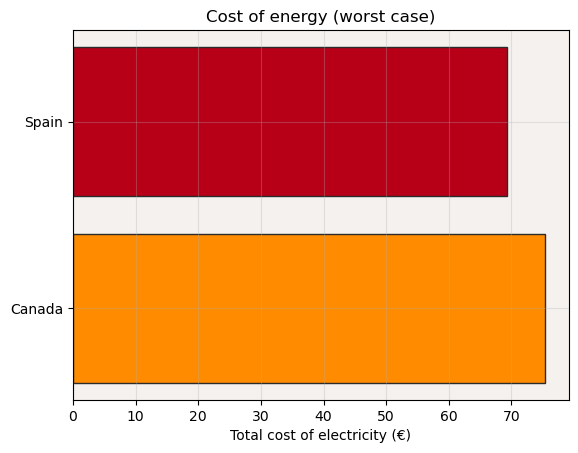

In [61]:
plt.rcdefaults()
fig, ax = plt.subplots()
labels=['Spain','Canada']

data = costs_worst
y_pos = np.arange(len(costs_worst))
ax.barh(y_pos,data,align='center',color=['#B70018','#FF8C00'],edgecolor='#2B2B2B')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis() 
ax.set_xlabel('Total cost of electricity (€)')
ax.set_title('Cost of energy (worst case)')
ax.grid(alpha=0.3)
ax = plt.gca()
ax.set_facecolor('#f4f1ee')
plt.show()


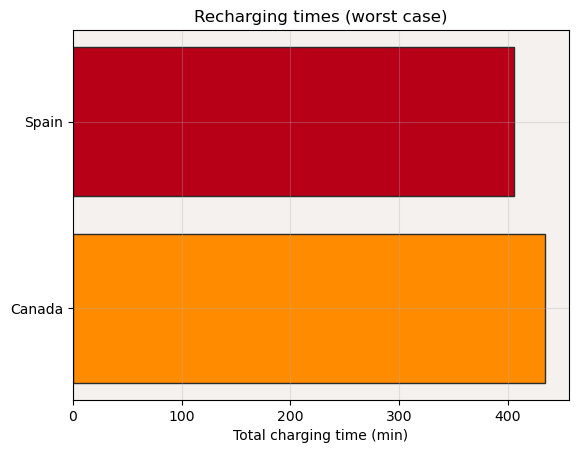

In [62]:
plt.rcdefaults()
fig, ax = plt.subplots()
labels=['Spain','Canada']

data = times_worst
y_pos = np.arange(len(costs_worst))
ax.barh(y_pos,data,align='center',color=['#B70018','#FF8C00'],edgecolor='#2B2B2B')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis() 
ax.set_xlabel('Total charging time (min)')
ax.set_title('Recharging times (worst case)')
ax.grid(alpha=0.3)
ax = plt.gca()
ax.set_facecolor('#f4f1ee')
plt.show()

In [63]:
#comparison on C02 emitted
carbon_intensity_spain= 167 #g/kWh
carbon_intensity_canada_values=[42,27] #values for Ontario and Quebec
carbon_intensity_canada=np.mean(carbon_intensity_canada_values)
energy_nissan_spain=e1+e2+e3+e4+e5+e6+e7+e8
energy_nissan_canada=e1c+e2c+e3c+e4c+e5c+e6c+e7c+e8c+e9c+e10c+e11c
CO2_spain=carbon_intensity_spain*0.546*energy_nissan_spain
CO2_canada=carbon_intensity_canada*0.90*energy_nissan_canada #on our path we found only one station powered by renewables directly 

CO2=[int(CO2_spain),int(CO2_canada)]


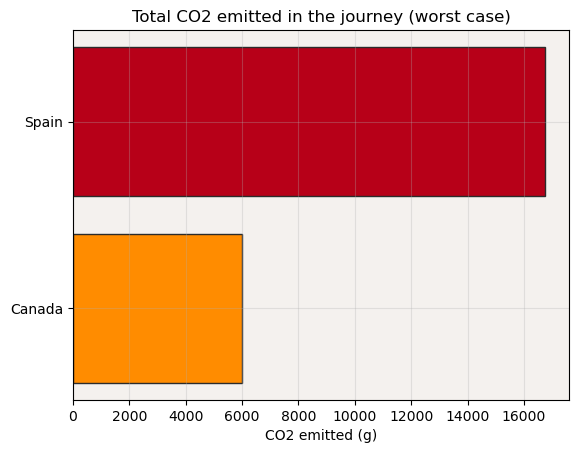

In [64]:
plt.rcdefaults()
fig, ax = plt.subplots()
labels=['Spain','Canada']

data = CO2
y_pos = np.arange(len(CO2))
ax.barh(y_pos,data,align='center',color=['#B70018','#FF8C00'],edgecolor='#2B2B2B')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis() 
ax.set_xlabel('CO2 emitted (g)')
ax.set_title('Total CO2 emitted in the journey (worst case)')
ax.grid(alpha=0.3)
ax = plt.gca()
ax.set_facecolor('#f4f1ee')
plt.show()
